# Lecure 8.2: linear regression and statistics continued

I was going to jump into netcdf files and doing data analysis with them, but decided it was more useful for your work to spend the time on digging in on model fitting. We will come back to netcdf files and climate data in the next two weeks

## Lecture:
    - Root mean square error (RMSE)
    - R^2, the "coefficient of determination"
    - training and testing spitting

### 8.2.1: Continue with what you were doing in Lec 8.1. Focus on the first exercises if you haven't done them yet

In [1]:
import numpy as np
import matplotlib.pyplot as plt #for plots
import matplotlib as mpl
%matplotlib inline 
from matplotlib import cm
import pandas as pd

mpl.rcParams['font.size'] = 12

In [2]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [3]:
from scipy import stats

In [4]:
import statsmodels.api as sm

In [5]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])


In [7]:
# same data as before:
X = df["RM"] # what we think the cost depends on
y = target["MEDV"]

In [8]:
# Note y, the target of what we are fitting to, goes first:
model = sm.OLS(y, X).fit()

# this is fitting y = aX, with no constant, i.e. using an intercept of zero

In [9]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          3.74e-256
Time:                        16:19:42   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.0

In [10]:
predictions = model.predict(X) # make the predictions by the model

Text(0, 0.5, 'House value ($1000s)')

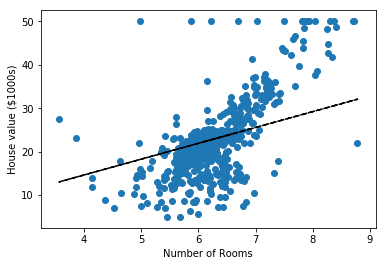

In [11]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
# this is not a very good fit

### E6. Following the example in the documentation below, add an intercept to the model and plot your result
http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [12]:
predictions = model.predict(X) - 34.67
#this got the yintercept but applied it to everything it seems

Text(0, 0.5, 'House value ($1000s)')

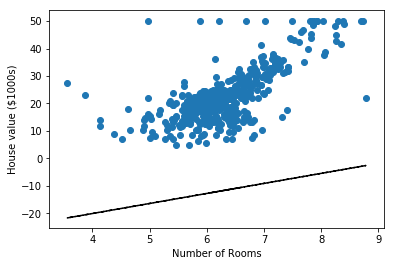

In [13]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

In [14]:
##################       SCRATCH       ############################
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)


X = sm.add_constant(X)
y = np.dot(X, beta) + e #this is supposed to somehow add in the y-intercept

In [15]:
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x, x**2))
beta = np.array([1,0.1,10])
e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [16]:
#np.dot?

In [17]:
#y

In [18]:
#X

In [19]:
#e

In [20]:
#beta

In [21]:
#x

In [22]:
#X

### Exercise

In [23]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [24]:
# same data as before:
X = df["RM"] # what we think the cost depends on
X2 = sm.add_constant(X)
y = target["MEDV"]

/Users/xfm684/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
X.shape

(506,)

In [26]:
y.shape

(506,)

In [27]:
X2 = sm.add_constant(X)
y = np.dot(X, y) - 34.68

In [28]:
# Note y, the target of what we are fitting to, goes first:
model = sm.OLS(y, X2).fit()

TypeError: object of type 'numpy.float64' has no len()

In [29]:
predictions = model.predict(X)

Text(0, 0.5, 'House value ($1000s)')

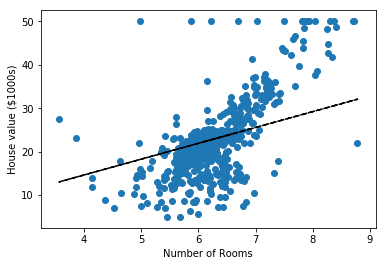

In [30]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

# this is not a very good fit

### E7. Complete the tutorial:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [31]:

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [32]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [33]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [34]:
print(boston_dataset.DESCR) #print statement is very necessary

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
boston['MEDV'] = boston_dataset.target

In [37]:
boston.isnull().sum()
#no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

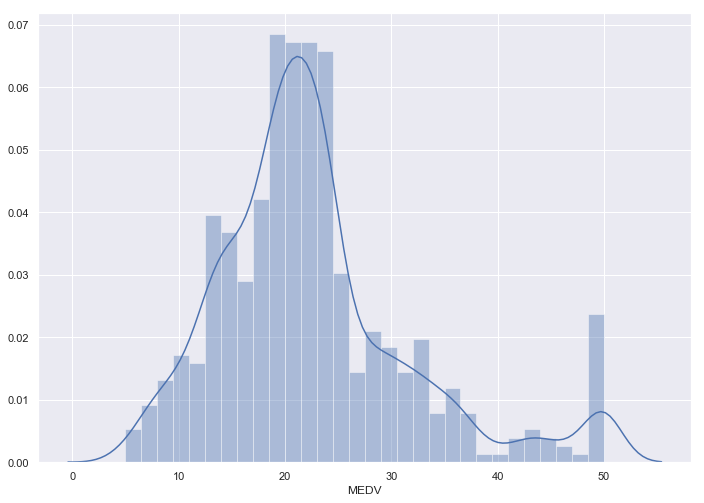

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

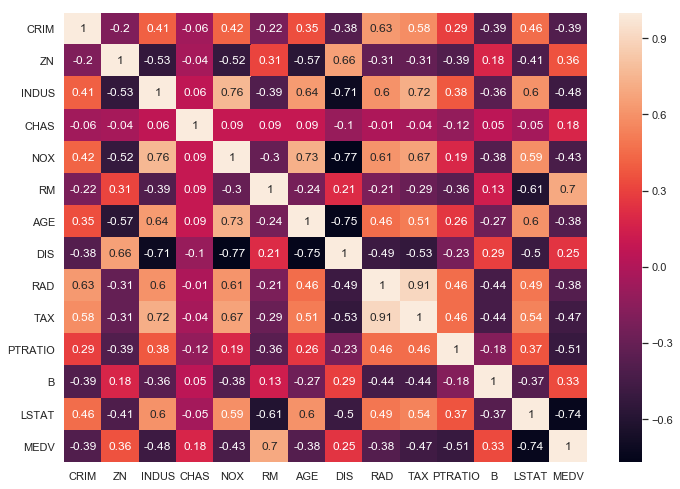

In [39]:

correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

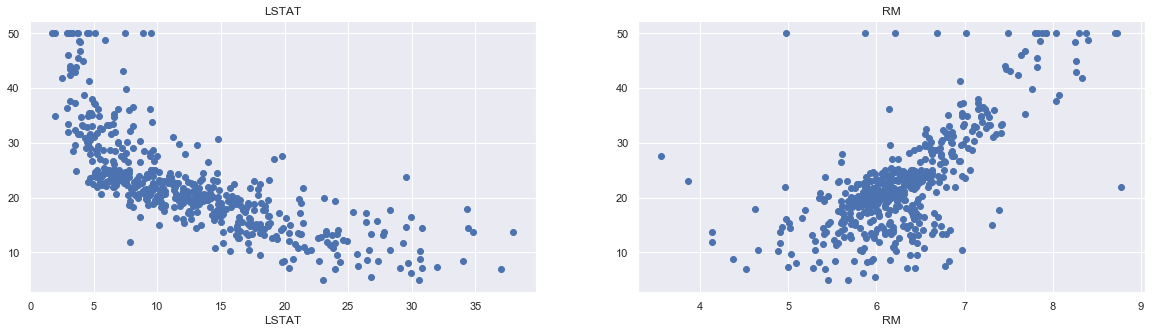

In [40]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)

In [41]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #have to add this in

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
#r2_score?

In [45]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse)) #have to add in these last two lines from above
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


### E8. Following the methods in the tutorial above, do the regression with just the rooms and not the other variable. How does this compare with the scipy result?¶
This may be helpful is figuring out how to write out the slope and intercept:

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

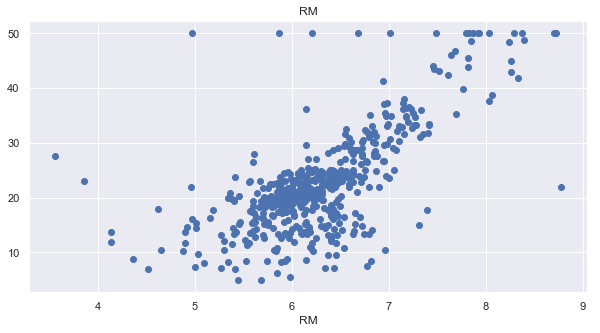

In [46]:
plt.figure(figsize=(10, 5))

features = [ 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)

In [47]:
X = pd.DataFrame(np.c_[boston['RM']])
Y = boston['MEDV']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [49]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse)) #have to add in these last two lines from above
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.4340897790637215


The model performance for testing set
--------------------------------------
RMSE is 4.895963186952216
R2 score is 0.6938399401553497


### 8.2.2 
Make a pairplot using the housing data: https://scipy-lectures.org/packages/statistics/index.html#pairplot-scatter-matrices

Explain what this tells you

In [51]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


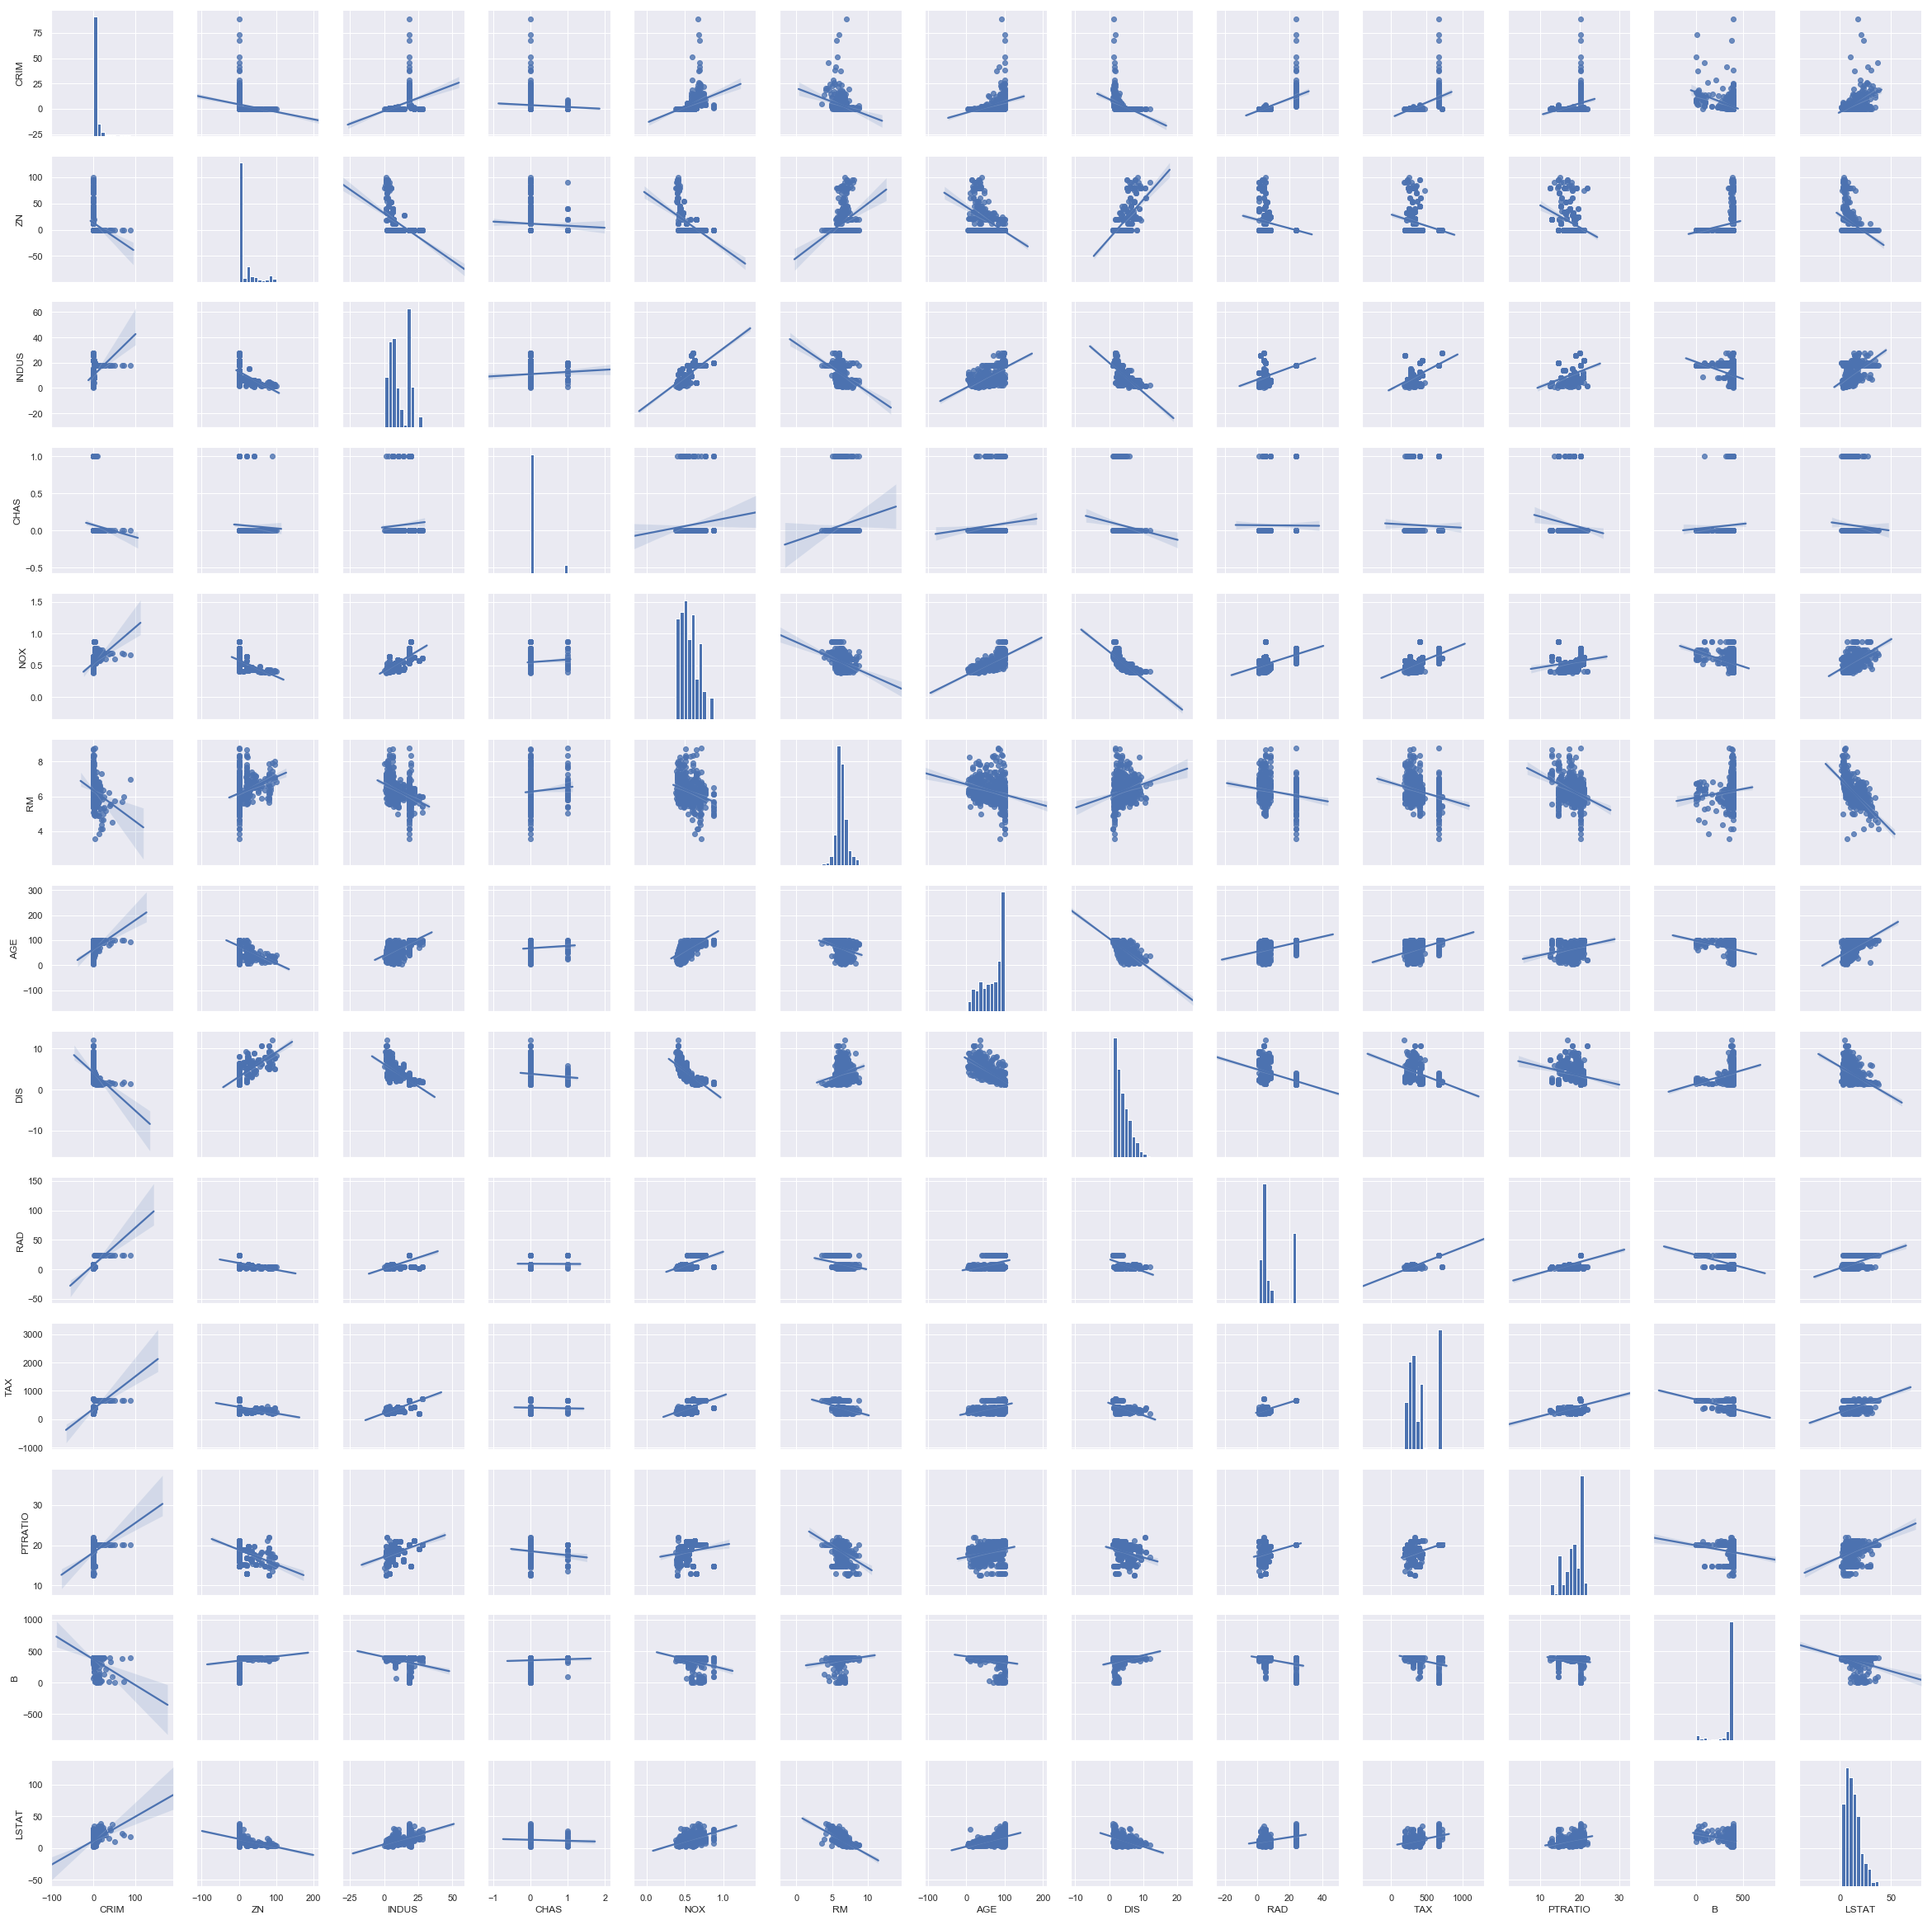

In [52]:
import seaborn
seaborn.pairplot(boston, vars=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
                 kind='reg')  

<Figure size 576x360 with 0 Axes>

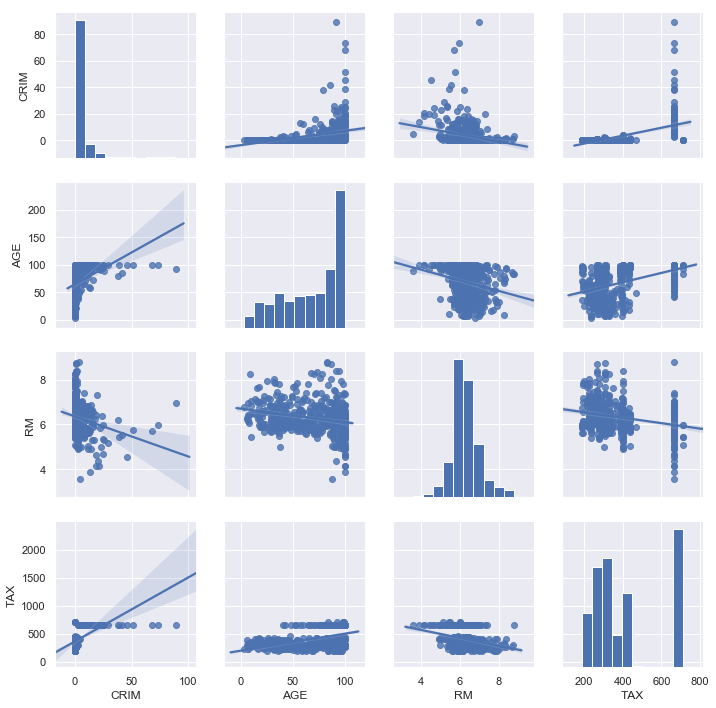

In [53]:
plt.figure(figsize=(8,5))
seaborn.pairplot(boston, vars=['CRIM','AGE', 'RM', 'TAX'],
                 kind='reg')  

There really doesn't seem to be a solid correlation between a lot of these factors

### 8.2.3 Now get creative
Using one or more of the datasets we have been using, ask two or more research questions, make appropriate model(s), and test your model(s) using regression. 
You might pick one easy and one hard research question. You might start with a simple linear model, but feel free to branch out to a non-linear model, or fancy statistics tests if you feel confident about doing so and can explain them. The point is that you are designing the modeling, not following a tutorial, and that you develop expertise on the methods you are using so you can defend their usage.

Places to look for inspiration:
- https://scipy-lectures.org/packages/statistics/index.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
- https://www.statsmodels.org/dev/examples/index.html

etc...


### Homework
As before, you will present your analysis to the class. Put a cleaned up version of your code, suitable for presentation, in a new notebook called HW_8_yourname. You will present this next Tuesday afternoon, after Riley's lecture.

In [54]:
print(boston_dataset.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [55]:
ted = pd.read_csv('ted.txt')

In [56]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [57]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [58]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [59]:
excel_file = 'movies.xls'
movies = pd.read_excel(excel_file)

In [60]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [61]:
movies.isna().sum()

Title                            0
Year                             0
Genres                           0
Language                         4
Country                          0
Content Rating                  22
Duration                         0
Aspect Ratio                    30
Budget                          57
Gross Earnings                 252
Director                         0
Actor 1                          0
Actor 2                          0
Actor 3                          2
Facebook Likes - Director        0
Facebook Likes - Actor 1         0
Facebook Likes - Actor 2         0
Facebook Likes - Actor 3         2
Facebook Likes - cast Total      0
Facebook likes - Movie           0
Facenumber in posters            0
User Votes                       0
Reviews by Users                 0
Reviews by Crtiics               3
IMDB Score                       0
dtype: int64

In [62]:
movies.dtypes

Title                           object
Year                             int64
Genres                          object
Language                        object
Country                         object
Content Rating                  object
Duration                         int64
Aspect Ratio                   float64
Budget                         float64
Gross Earnings                 float64
Director                        object
Actor 1                         object
Actor 2                         object
Actor 3                         object
Facebook Likes - Director        int64
Facebook Likes - Actor 1         int64
Facebook Likes - Actor 2         int64
Facebook Likes - Actor 3       float64
Facebook Likes - cast Total      int64
Facebook likes - Movie           int64
Facenumber in posters            int64
User Votes                       int64
Reviews by Users                 int64
Reviews by Crtiics             float64
IMDB Score                     float64
dtype: object

In [64]:
movies.dropna()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
5,The Broadway Melody,1929,Musical|Romance,English,USA,Passed,100,1.37,379000.0,2808000.0,...,77,28,4.0,109,167,8,4546,71,36.0,6.3
8,42nd Street,1933,Comedy|Musical|Romance,English,USA,Unrated,89,1.37,439000.0,2300000.0,...,610,105,45.0,995,439,2,7921,97,65.0,7.7
11,Top Hat,1935,Comedy|Musical|Romance,English,USA,Approved,81,1.37,609000.0,3000000.0,...,610,172,23.0,824,1000,2,13269,98,66.0,7.8
12,Modern Times,1936,Comedy|Drama|Family,English,USA,G,87,1.37,1500000.0,163245.0,...,309,8,8.0,352,0,1,143086,211,120.0,8.6
14,Snow White and the Seven Dwarfs,1937,Animation|Family|Fantasy|Musical,English,USA,Approved,83,1.37,2000000.0,184925485.0,...,82,47,31.0,229,0,1,133348,204,145.0,7.7
18,Gone with the Wind,1939,Drama|History|Romance|War,English,USA,G,226,1.37,3977000.0,198655278.0,...,503,384,248.0,1862,16000,1,215340,706,157.0,8.2
20,The Wizard of Oz,1939,Adventure|Family|Fantasy|Musical,English,USA,Passed,102,1.37,2800000.0,22202612.0,...,695,421,357.0,2509,14000,3,291875,533,213.0,8.1
23,Pinocchio,1940,Animation|Family|Fantasy|Musical,English,USA,Approved,88,1.37,2600000.0,84300000.0,...,1000,48,40.0,1178,0,0,90360,147,105.0,7.5
35,Duel in the Sun,1946,Drama|Romance|Western,English,USA,Unrated,144,1.37,8000000.0,20400000.0,...,469,436,332.0,2037,403,0,6304,87,32.0,6.9


In [65]:
movies.isna().sum()

Title                            0
Year                             0
Genres                           0
Language                         4
Country                          0
Content Rating                  22
Duration                         0
Aspect Ratio                    30
Budget                          57
Gross Earnings                 252
Director                         0
Actor 1                          0
Actor 2                          0
Actor 3                          2
Facebook Likes - Director        0
Facebook Likes - Actor 1         0
Facebook Likes - Actor 2         0
Facebook Likes - Actor 3         2
Facebook Likes - cast Total      0
Facebook likes - Movie           0
Facenumber in posters            0
User Votes                       0
Reviews by Users                 0
Reviews by Crtiics               3
IMDB Score                       0
dtype: int64

In [66]:
movies['imdb_score'] = movies['IMDB Score']

In [67]:
movies.isna().sum()

Title                            0
Year                             0
Genres                           0
Language                         4
Country                          0
Content Rating                  22
Duration                         0
Aspect Ratio                    30
Budget                          57
Gross Earnings                 252
Director                         0
Actor 1                          0
Actor 2                          0
Actor 3                          2
Facebook Likes - Director        0
Facebook Likes - Actor 1         0
Facebook Likes - Actor 2         0
Facebook Likes - Actor 3         2
Facebook Likes - cast Total      0
Facebook likes - Movie           0
Facenumber in posters            0
User Votes                       0
Reviews by Users                 0
Reviews by Crtiics               3
IMDB Score                       0
imdb_score                       0
dtype: int64

In [69]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score,imdb_score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,22,9.0,481,691,1,10718,88,69.0,8.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,0.0,4,0,1,5,1,1.0,4.8,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,12,6.0,108,226,0,4849,45,48.0,8.3,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,23,18.0,203,12000,1,111841,413,260.0,8.3,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,20,3.0,455,926,1,7431,84,71.0,8.0,8.0


In [75]:
#movies.Year

<Figure size 576x360 with 0 Axes>

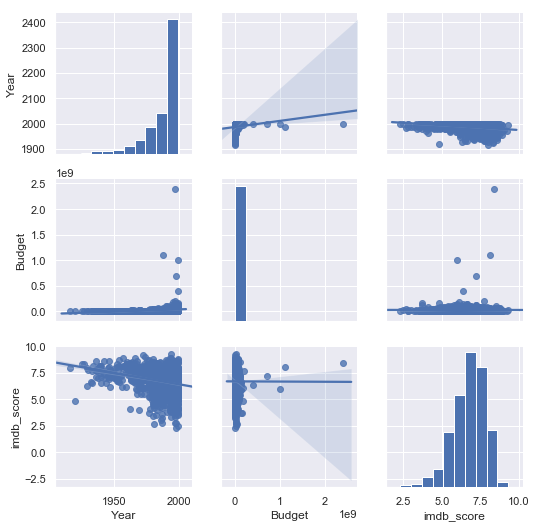

In [74]:
plt.figure(figsize=(8,5))
seaborn.pairplot(movies, vars=['Year', 'Budget', 'imdb_score'],
                 kind='reg')  

In [76]:
movies['budget'] = movies['Budget' <= 0.5e9]

TypeError: '<=' not supported between instances of 'str' and 'float'

Text(0.5, 1.0, 'Subsection of Budget vs. IMDB Score')

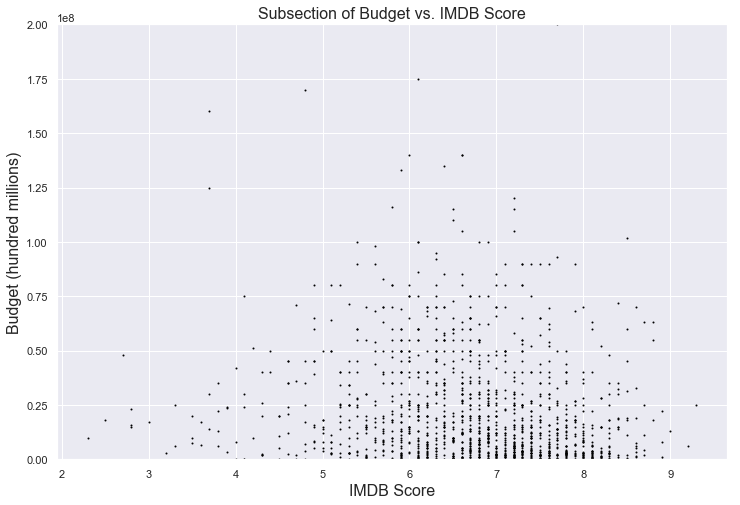

In [81]:
x = movies.imdb_score
y = movies.Budget

plt.figure(figsize = (12,8))
mpl.rcParams['font.size'] = 12
plt.scatter(x,y, s=1, color='black')
plt.ylim((0,0.2e9))
plt.xlabel('IMDB Score', fontsize=16)
plt.ylabel('Budget (hundred millions)', fontsize=16)
plt.title('Subsection of Budget vs. IMDB Score', fontsize=16)

In [82]:
X = pd.DataFrame(np.c_[movies['imdb_score']])
Y = movies['Budget']

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 1)
(268, 1)
(1070,)
(268,)


In [84]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [85]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse)) #have to add in these last two lines from above
print('R2 score is {}'.format(r2))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Things with highest correlations

gross earnings & user votes & reviews by users 

Facebook likes actor 2 & facebook likes actor 3 

Facebook likes - cast total & facebook likes actor 1 & 2 

facebook likes movie & user votes user votes & reviews by users & reviews by critics

In [86]:
from scipy import stats

In [89]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["Budget"])

In [93]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["IMDB Score"],target["Budget"])

KeyError: 'IMDB Score'